In [0]:
%sql
SELECT * FROM `workspace`.`project`.`citizen_feedback`;

policy_name,feedback
Education Policy,The new curriculum is helpful for students.
Education Policy,Too much syllabus for one semester.
Education Policy,The digital learning approach is innovative.
Education Policy,Teachers need more training on the new system.
Education Policy,Online classes are well-organized.
Transport Policy,Bus timings are inconsistent and late.
Transport Policy,Metro connectivity has improved travel time.
Transport Policy,Road conditions are poor even after repairs.
Transport Policy,Traffic management has become better lately.
Transport Policy,More parking spaces are required.


In [0]:
# Read the SQL table into a PySpark DataFrame
df = spark.table(
    "workspace.project.citizen_feedback"
)
# Display the DataFrame to confirm it's loaded
display(df)

policy_name,feedback
Education Policy,The new curriculum is helpful for students.
Education Policy,Too much syllabus for one semester.
Education Policy,The digital learning approach is innovative.
Education Policy,Teachers need more training on the new system.
Education Policy,Online classes are well-organized.
Transport Policy,Bus timings are inconsistent and late.
Transport Policy,Metro connectivity has improved travel time.
Transport Policy,Road conditions are poor even after repairs.
Transport Policy,Traffic management has become better lately.
Transport Policy,More parking spaces are required.


In [0]:
%pip install textblob
from textblob import TextBlob
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType

# Assuming your feedback column is named 'feedback'
# If it's different, change 'feedback' in the line below
text_col = 'feedback'

# Define a function to get sentiment label
def get_sentiment_label(text):
    if text is None:
        return "Invalid"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Register the Python function as a UDF
sentiment_udf = udf(get_sentiment_label, StringType())

# Apply the UDF to your DataFrame to create a new 'sentiment' column
df_with_sentiment = df.withColumn(
    "sentiment", 
    sentiment_udf(col(text_col))
)

# Display the DataFrame with the new sentiment column
display(df_with_sentiment)

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


policy_name,feedback,sentiment
Education Policy,The new curriculum is helpful for students.,Positive
Education Policy,Too much syllabus for one semester.,Positive
Education Policy,The digital learning approach is innovative.,Positive
Education Policy,Teachers need more training on the new system.,Positive
Education Policy,Online classes are well-organized.,Neutral
Transport Policy,Bus timings are inconsistent and late.,Negative
Transport Policy,Metro connectivity has improved travel time.,Neutral
Transport Policy,Road conditions are poor even after repairs.,Negative
Transport Policy,Traffic management has become better lately.,Positive
Transport Policy,More parking spaces are required.,Positive


In [0]:
# Group the data by sentiment and count the occurrences
sentiment_counts = df_with_sentiment.groupBy("sentiment").count()

# Display the summary table
display(sentiment_counts)

sentiment,count
Neutral,20
Negative,7
Positive,23


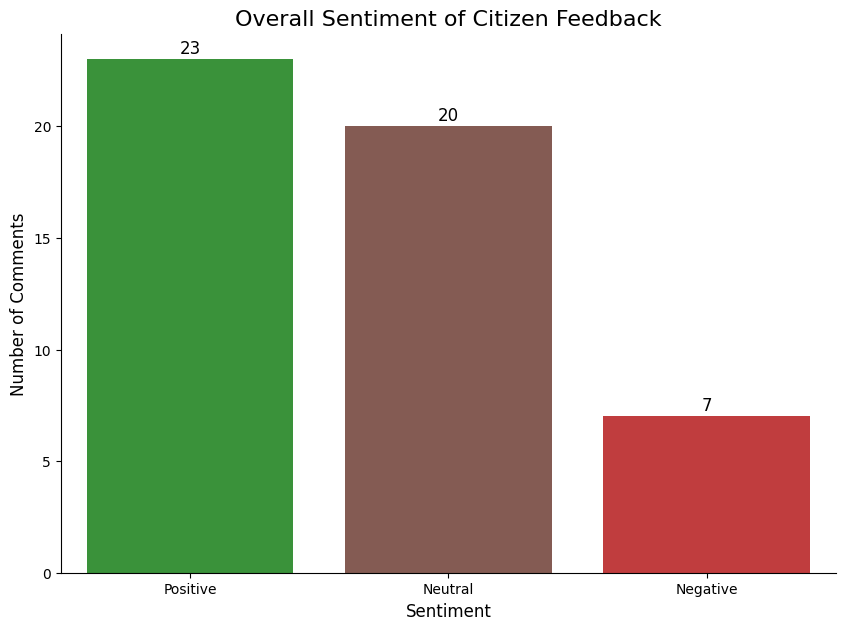

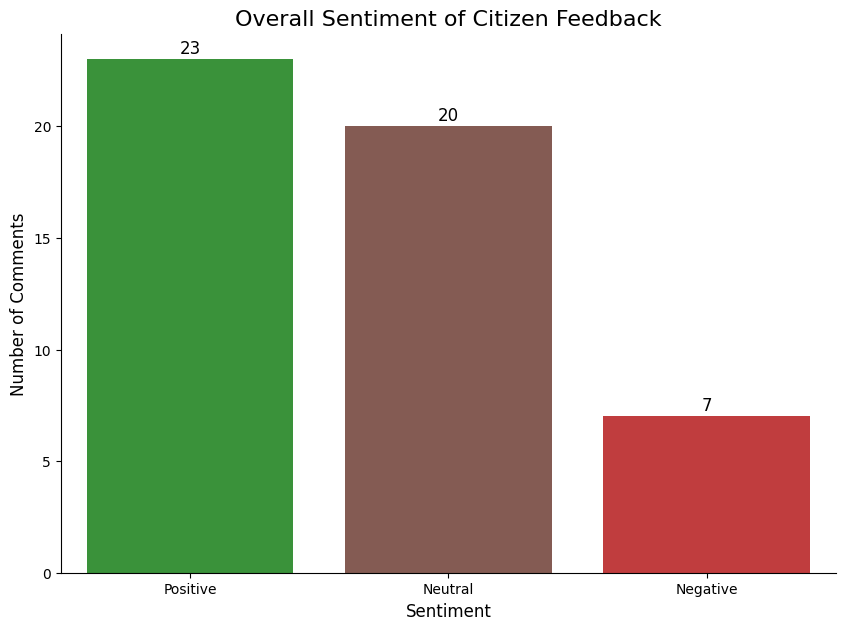

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert your 'sentiment_counts' PySpark DataFrame to a Pandas DataFrame for plotting
sentiment_counts_pd = sentiment_counts.toPandas()

# Create the bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x='sentiment',
    y='count',
    data=sentiment_counts_pd,
    order=['Positive', 'Neutral', 'Negative'], # Specify order for consistency
    palette={'Positive': '#2ca02c', 'Negative': '#d62728', 'Neutral': '#8c564b'}
)

# Add titles and labels for clarity
plt.title('Overall Sentiment of Citizen Feedback', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12,
                color='black',
                xytext=(0, 8),
                textcoords='offset points')



In [0]:
user_text = input("Enter your feedback: ")
sentiment_result = get_sentiment_label(user_text)
print(f"Sentiment: {sentiment_result}")

Enter your feedback:  the policy is good

Sentiment: Positive


In [0]:
user_text = input("Enter your feedback: ")
sentiment_result = get_sentiment_label(user_text)
print(f"Sentiment: {sentiment_result}")

Enter your feedback:  this is a very worst experience i ever had

Sentiment: Negative


In [0]:
def analyze_and_save():
    user_text = input("Enter your feedback: ")
    sentiment = get_sentiment_label(user_text)
    print(f"\nDetected Sentiment: {sentiment}")
# === Step 4: Create a DataFrame with this single new entry ===
    new_data = [('policy',user_text, sentiment)]
    new_df = spark.createDataFrame(new_data, ["policy_name","feedback", "sentiment"])
# === Step 5: Append this new row to your existing Spark table ===
# ⚠️ Replace 'your_existing_table_name' with your actual table name
    table_name = "citizen_feedback"
    new_df.write.mode("append").saveAsTable(table_name)
    print(f"\n✅ New feedback added successfully to table '{table_name}'")
# === Step 6: Show updated table ===
    display(spark.table(table_name))
analyze_and_save()

Enter your feedback:  its not either good or bad


Detected Sentiment: Positive

✅ New feedback added successfully to table 'citizen_feedback'


policy_name,feedback,sentiment
policy,its not either good or bad,Positive
policy,the policy is good,Positive


In [0]:
display(df)

policy_name,feedback
Education Policy,The new curriculum is helpful for students.
Education Policy,Too much syllabus for one semester.
Education Policy,The digital learning approach is innovative.
Education Policy,Teachers need more training on the new system.
Education Policy,Online classes are well-organized.
Transport Policy,Bus timings are inconsistent and late.
Transport Policy,Metro connectivity has improved travel time.
Transport Policy,Road conditions are poor even after repairs.
Transport Policy,Traffic management has become better lately.
Transport Policy,More parking spaces are required.


In [0]:
analyze_and_save()

Enter your feedback:  this policy was implemented last week


Detected Sentiment: Neutral

✅ New feedback added successfully to table 'citizen_feedback'


policy_name,feedback,sentiment
policy,this policy was implemented last week,Neutral
policy,its not either good or bad,Positive
policy,the policy is good,Positive
